## Name(s):

In [157]:
#BULBASAUR

# Assignment 2: Intro to Clustering

In this assignment we'll be looking at three popular types of clustering algorithms -- K-Means clustering, Hierarchical clustering and Density Based clustering. We'll also look at some measures of cluster quality like cohesion, separation and silhoutte coefficient.

## Part 1: K Means Clustering

In k means clustering you are given a dataset and a hyperparameter k specifying the number of desired of output clusters. The basic idea of k means is to minimize the sum of squared error (SSE) of the output clusters. Unfortunately, the solution to this problem is NP Hard. In this assignment we'll be implementing the iterative algorithm that produces the locally optimal solution to this problem but, guarantees convergence.

In [158]:
# Some headers
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt

In [159]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

In [160]:
# get data from text file
data = np.genfromtxt("data.csv", delimiter=",")

Q1. Implement the function `generateClusters` that returns clusters, given the cluster centroids (`mu`) and the dataset (`data`). Each datapoint needs to be associated to the closest cluster centroid.

In [161]:
def generateClusters(data, mu):
    global square, sqrt, np
    clusters = []
    for k in range(len(mu)):
        q = []
        clusters.append(q)
        
    for i in range(len(data)):
        min_index = 0
        min_distance = 99999 
        for j in range(len(mu)):
            temp_distance = sqrt(square(data[i][0] - mu[j][0]) + square(data[i][1] - mu[j][1]))
            if temp_distance < min_distance:
                min_distance = temp_distance
                min_index = j
                
        clusters[min_index].append(data[i])
    return clusters

Q2. Implement the function `recompute_centroids` that returns the centroids given a set of input clusters. Hint: you need to calculate the mean for each cluster.

In [162]:
def recompute_centroids(clusters):
    centroids = []
    for i in range (len(clusters)):
        centroids.append(sum(clusters[i])/len(clusters[i]))
    return centroids

Q3. Implement the function `checkConvergence` that checks if the termination condition of k means algorithm has reached, i.e. the previous centroids are the same as the new centroids. 

In [163]:
def checkConvergence(mu, previous_mu):
    global np
    return np.array_equal(mu, previous_mu)

Q4. Implement the function `kMeansClustering` that returns k clusters along with their centroids given the input dataset and the desired number of clusters (`k`).

In [164]:
def kMeansClustering(data, k):
    random_index_list = random.sample(range(0, len(data)), k)
    mu = []
    previous_mu = []
    for i in range (len(random_index_list)):
        mu.append(data[random_index_list[i]])
    while not checkConvergence(mu, previous_mu):
        clusters = generateClusters(data,mu)
        previous_mu = mu
        mu = recompute_centroids(clusters)
    return(mu, clusters)

In [165]:
#function to calculate cohesion
def calculateCohesion(clusters):
    global square, sqrt, np, data
    cohesion = 0
    for i in range(len(clusters)):
        thisCentroid = sum(np.array(clusters[i]))/len(clusters[i])
        for j in range(len(clusters[i])):
            cohesion +=  square(clusters[i][j][0] - thisCentroid[0]) + square(clusters[i][j][1] - thisCentroid[1])
    return cohesion

In [166]:
#function to calculate separation
def calculateSeparation(clusters):
    global square, sqrt, np, data
    overAllCentroid = sum(data)/len(data)
    separation = 0
    for i in range(len(clusters)):
        thisCentroid = sum(np.array(clusters[i]))/len(clusters[i])
        separation +=  len(clusters[i])*(square(overAllCentroid[0] - thisCentroid[0]) \
                        + square(overAllCentroid[1] - thisCentroid[1]))
    return separation

Q5. Cluster the data present in `data.csv` using `kMeansClustering` with `k = 5`. Display the clusters using `plt.scatter`, make sure to mark different clusters with a different color. Also calculate the average cohesion and separation for the generated clusters.

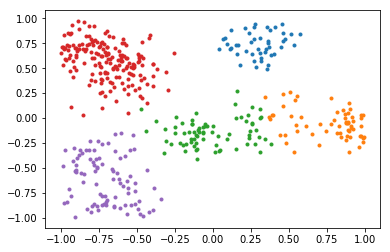

cohesion: 28.397657714
separation: 244.314846658


In [167]:
#Display the clusters, display cohesion and separation
mu, clusters = kMeansClustering(data, 5)
for i in range(len(clusters)):
    cluster = np.array(clusters[i])
    plt.scatter(cluster[:,0],cluster[:,1], marker='.')
plt.show()
print('cohesion:',calculateCohesion(clusters))
print('separation:',calculateSeparation(clusters))

Q. (Extra Credit) Implement kMeans++, to initialise the centroids in the k Means algorithm. Does this improve performance? Give cohesion and spearation values.

In [168]:
# your code goes here

## Part 2: Hierarchical Clustering

For this part you'll be implementing single-linkage clustering, one of several methods of hierarchical clustering. It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other. In the beginning of the agglomerative clustering process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters, until all elements end up being in the same cluster. At each step, the two clusters separated by the shortest distance are combined. Here distance is defined as the euclidean distance between the two points.

In [169]:
# get data from text file
data = np.genfromtxt("data2.csv", delimiter=",")

Q6. Implement single-linkage clustering. Print the cophenetic correlation coefficient (CPCC) for the resultant clustering.

In [170]:
#function to calculate Euclid distance between 2 data points
def calculateDistance(data1,data2):
    global square, sqrt
    distance =  sqrt(square(data1[0] - data2[0]) + square(data1[1] - data2[1]))
    return distance

In [171]:
#function to generate initial distance matrix for the whole data set
def initMatrix (data):
    matrix = []
    for i in range(len(data)):
        newRow = []
        for j in range(len(data)):
            if i == j:
                newRow.append(100)
            else:
                newRow.append(calculateDistance(data[i],data[j]))
        matrix.append(newRow)
    return matrix

In [172]:
#function to generate initial CPCC matrix for the whole data set
def initCPCCMatrix (data):
    matrix = []
    for i in range(len(data)):
        newRow = []
        for j in range(len(data)):
            newRow.append(-1)
        matrix.append(newRow)
    return matrix

In [173]:
#function to find the shortest value in distance matrix
#return the index in matrix
def findMinIndex():
    global matrix
    row = column = 0
    minDistance = 100
    for i in range(len(matrix)-1):
        for j in range(i+1,len(matrix)):
            if matrix[i][j] < minDistance:
                minDistance = matrix[i][j]
                row = i
                column = j
    if minDistance == 100:
        return 0, 0
    else: 
        return row,column

In [174]:
#function to update matrix after each combining
def updateMatrix(clusterIndex1, clusterIndex2):
    global data, matrix, addedList
    if clusterIndex2 == -1:
        for i in range(len(matrix)):
            if addedList[i] == -1:
                minDistance = 100
                for j in range(len(matrix)):
                    if addedList[j] == clusterIndex1 and matrix[i][j] < minDistance:
                        minDistance = matrix[i][j]
                for k in range(len(matrix)):
                    if addedList[k] == clusterIndex1:
                        matrix[i][k] = minDistance
                        matrix[k][i] = minDistance 
    else:
        minDistance = 100
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if addedList[i] == clusterIndex1 and addedList[j] == clusterIndex2 and matrix[i][j] < minDistance:
                    minDistance = matrix[i][j]
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if addedList[i] == clusterIndex1 and addedList[j] == clusterIndex2:
                    matrix[i][j] = minDistance
                    matrix[j][i] = minDistance    

In [175]:
#matrix store distance info and CPCCMatrix stores CPCC info
#when several data points are in group, edit the distance between each to infinity(in this project, 100)
#there are 3 cases of combining: singe point with single point, single point with group, group and group
#use nested if-else to solve each one by cases
addedList = [-1]*len(data)
matrix = initMatrix(data)
CPCCMatrix = initCPCCMatrix(data)
run = True
while(run):
    x,y = findMinIndex()
    if x == 0 and y ==0:
        run = False
    else:
        if addedList[x] == -1 and addedList[y] == -1:
            CPCCMatrix[x][y] = matrix[x][y]
            CPCCMatrix[y][x] = matrix[x][y]
            addedList[x] = x
            addedList[y] = x
            for i in range(len(data)):
                for j in range(len(data)):
                    if addedList[i] == addedList[j] and addedList[i] != -1:
                        matrix[i][j] = 100
            clusterList = list(set(addedList))
            for i in clusterList:
                if i != addedList[x]:
                    updateMatrix(addedList[x],i)
        elif addedList[x] == -1 and addedList[y] != -1:        
            for i in range(len(data)):
                if addedList[i] == addedList[y]:
                    CPCCMatrix[x][i] = matrix[x][y]
                    CPCCMatrix[i][x] = matrix[x][y]
            addedList[x] = addedList[y]
            clusterList = list(set(addedList))
            for i in range(len(data)):
                for j in range(len(data)):
                    if addedList[i] == addedList[j] and addedList[i] != -1:
                        matrix[i][j] = 100
            for i in clusterList:
                if i != addedList[x]:
                    updateMatrix(addedList[x],i)           
        elif addedList[x] != -1 and addedList[y] == -1:
            for i in range(len(data)):
                if addedList[i] == addedList[x]:
                    CPCCMatrix[y][i] = matrix[x][y]
                    CPCCMatrix[i][y] = matrix[x][y]
            addedList[y] = addedList[x]
            clusterList = list(set(addedList))
            for i in range(len(data)):
                for j in range(len(data)):
                    if addedList[i] == addedList[j] and addedList[i] != -1:
                        matrix[i][j] = 100
            for i in clusterList:
                if i != addedList[y]:
                    updateMatrix(addedList[y],i)
        else: 
            for i in range(len(data)):
                for j in range(len(data)):
                    if addedList[i] == addedList[x] and addedList[j] == addedList[y]:
                        CPCCMatrix[j][i] = matrix[x][y]
                        CPCCMatrix[i][j] = matrix[x][y]
            temp = addedList[x]
            for i in range(len(data)):
                if addedList[i] == temp:
                    addedList[i] = addedList[y]
            clusterList = list(set(addedList))
            for i in range(len(data)):
                for j in range(len(data)):
                    if addedList[i] == addedList[j] and addedList[i] != -1:
                        matrix[i][j] = 100
            for i in clusterList:
                if i != addedList[y]:
                    updateMatrix(addedList[y],i)
#move the needed CPCC records and distance records to 2 lists, using np.corrcoef to show their correlation coefficient
CPCCList = []
for i in range(len(data)-1):
        for j in range(i+1,len(data)):
            CPCCList.append(CPCCMatrix[i][j])
matrix = initMatrix(data)
print()
distanceList = []
for i in range(len(data)-1):
        for j in range(i+1,len(data)):
            distanceList.append(matrix[i][j])
print(np.corrcoef(distanceList,CPCCList))


[[ 1.          0.88083956]
 [ 0.88083956  1.        ]]


## Part 3: Density Based Clustering (DBSCAN)

For this part we'll be implementing DBSCAN, one of the most popular density based clustering algorithms.

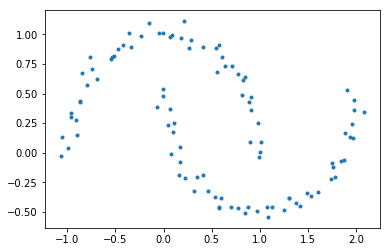

In [176]:
# get data from text file
data = np.genfromtxt("data3.csv", delimiter=",")
plt.scatter(data[:,0],data[:,1], marker='.')

Q7. Run your `kMeansClustering` with `k = 2` and display the output clusters (make sure that different clusters are marked with different colors). Also display the cohesion and separation values for the clusters. What do you observe?

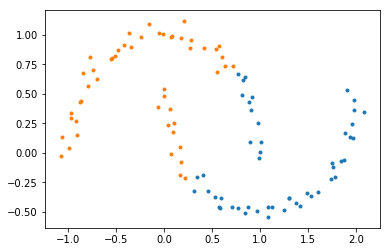

In [177]:
mu, clusters = kMeansClustering(data, 2)
for i in range(2):
    cluster = np.array(clusters[i])
    plt.scatter(cluster[:,0],cluster[:,1], marker='.')
plt.show()

Q8. Implement the DBSCAN algorithm and display output clusters. DBSCAN requires two parameters: epsilon and the minimum number of points required to form a dense region (minPts). A good starting point for epsilon is `0.3` and `minPts = 2`. You should tweak these values and observe how the resultant clusters change.

In [178]:
#function to calculate distance of 2 points
def calculatePointDistance(data1,data2):
    global square, sqrt
    distance =  sqrt(square(data1[0] - data2[0]) + square(data1[1] - data2[1]))
    return distance

In [179]:
#function to calculate neighbor amount of all point and write the records to a list
def countNeighbor():
    global data, countNeighbor, epsilon
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j and calculatePointDistance(data[i],data[j]) <= epsilon:
                countNeighborList[i] += 1  

In [180]:
#funtion to assign border point to its nearest core point
def setBorderPoints(index):
    global data, epsilon, classifyList, borderList
    minDistance = 100
    minIndex = -1
    for i in range(len(data)):
        if calculatePointDistance(data[index],data[i]) < minDistance \
        and i != index and classifyList[i] != -1:
            minDistance = calculatePointDistance(data[index],data[i])
            minIndex = i
    if minDistance <= epsilon:
        borderList[index] = minIndex        

In [181]:
#function to update cluster index of a core point's border points
def updateBorderCluster(oldClusterIndex, newClusterIndex):
    global borderList, data
    for i in range(len(data)):
        if borderList[i] == oldClusterIndex:
            borderList[i] = newClusterIndex

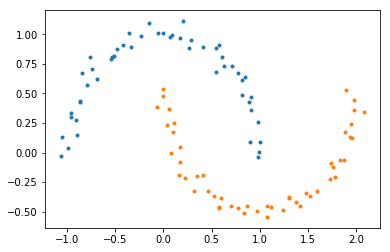

In [182]:
#countNeighborList indicates hwo many neighbors within epsilon a point has
countNeighborList = [0]*len(data)
#classifyList indicates which cluster a core point in, -1 represents this point is not a core point
classifyList = [-1]*len(data)
#borderList indicates which cluster a border point in, -1 represents this point is not a border point
borderList = [-1]*len(data)
epsilon = 0.3
minPts = 2
recordCluster = [-1]*len(data)
countNeighbor()
#loop to assign each core point to a single cluster
for i in range(len(data)):
    if countNeighborList[i] > minPts:
        classifyList[i] = i       
#loop to set border points to the nearest cluster 
for i in range(len(data)):
    if classifyList[i] == -1:
        setBorderPoints(i)
#loop to combine core points to cluster, during each combining update their border point's cluster as well
for i in range(len(data)):
    for j in range(len(data)):
        if classifyList[i] != -1 and classifyList[j] != -1 and classifyList[j] \
        != classifyList[i] and i != j and calculatePointDistance(data[i], data[j]) <= epsilon:
            if classifyList[i] < classifyList[j]:
                updateBorderCluster(classifyList[j],classifyList[i])
                for k in range(len(data)):
                    if classifyList[k] == classifyList[j]:
                        classifyList[k] = classifyList[i]
            else:
                updateBorderCluster(classifyList[i],classifyList[j])
                for k in range(len(data)):
                    if classifyList[k] == classifyList[i]:
                        classifyList[k] = classifyList[j]
#move the cluster info of border points from borderList to classifyList
for i in range(len(data)):
    if borderList[i] != -1:
        classifyList[i] = borderList[i]
#create clusters
clustersList = list(set(classifyList))
if -1 in clustersList:
    clustersList.remove(-1)
clusters = []
for i in clustersList:
    temp=[]
    for j in range(len(data)):
        if classifyList[j] == i:
            temp.append(data[j])
    clusters.append(temp)
#display clustering result
for i in range(len(clusters)):
    cluster = np.array(clusters[i])
    plt.scatter(cluster[:,0],cluster[:,1], marker='.')
plt.show()

Q9. Display the separation and cohesion values for the output clusters obtained in Q8. How are the clusters obtained in Q8 different from the ones obtained in Q7?

In [186]:
# display cohesion and separation using functions in part 1
print('cohesion:',calculateCohesion(clusters))
print('separation:',calculateSeparation(clusters))
print('\nThe clusters gained in Q8 is the shape we want. In this data set, density besed DBSCAN provides a better clustering  result.')

cohesion: 61.2032625579
separation: 39.0186645018

The clusters gained in Q8 is the shape we want. In this data set, density besed DBSCAN provides a better clustering  result.
